<a href="https://colab.research.google.com/github/Wonjae98/PUBG_analysis/blob/main/PUBG_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from google.colab import drive

# 1. 목표설정

# 2. 데이터 탐색

## 데이터 불러오기

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount("/gdrive")
data=pd.read_csv("/gdrive/MyDrive/PUBG/train_V2.csv")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## 데이터 피쳐 확인

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## 데이터 실제 열 확인

In [ ]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


## 결측값 데이터 확인

In [ ]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
userCnt            0
memberCnt          0
killRatio          1
dtype: int64

In [ ]:
pd.set_option('display.max_columns', 30)
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


모든 열의 데이터가 0 이므로 우리 모델링에 필요 없다고 판단하여서 바로 드롭

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['winPlacePerc'].isnull().sum()

0

## 수치형 데이터 분포 확인

In [ ]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [ ]:
numeric_data=data.select_dtypes(include=['int','float'])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 25 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  maxPlace         int64  
 13  numGroups        int64  
 14  rankPoints       int64  
 15  revives          int64  
 16  rideDistance     float64
 17  roadKills        int64  
 18  swimDistance     float64
 19  teamKills        int64  
 20  vehicleDestroys  int64  
 21  walkDistance     float64
 22  weaponsAcquired  int64  
 23  winPoints        int64  
 24  winPlacePerc     float64
dtypes: float64(6), int64(19)
memory usage: 848.2 MB


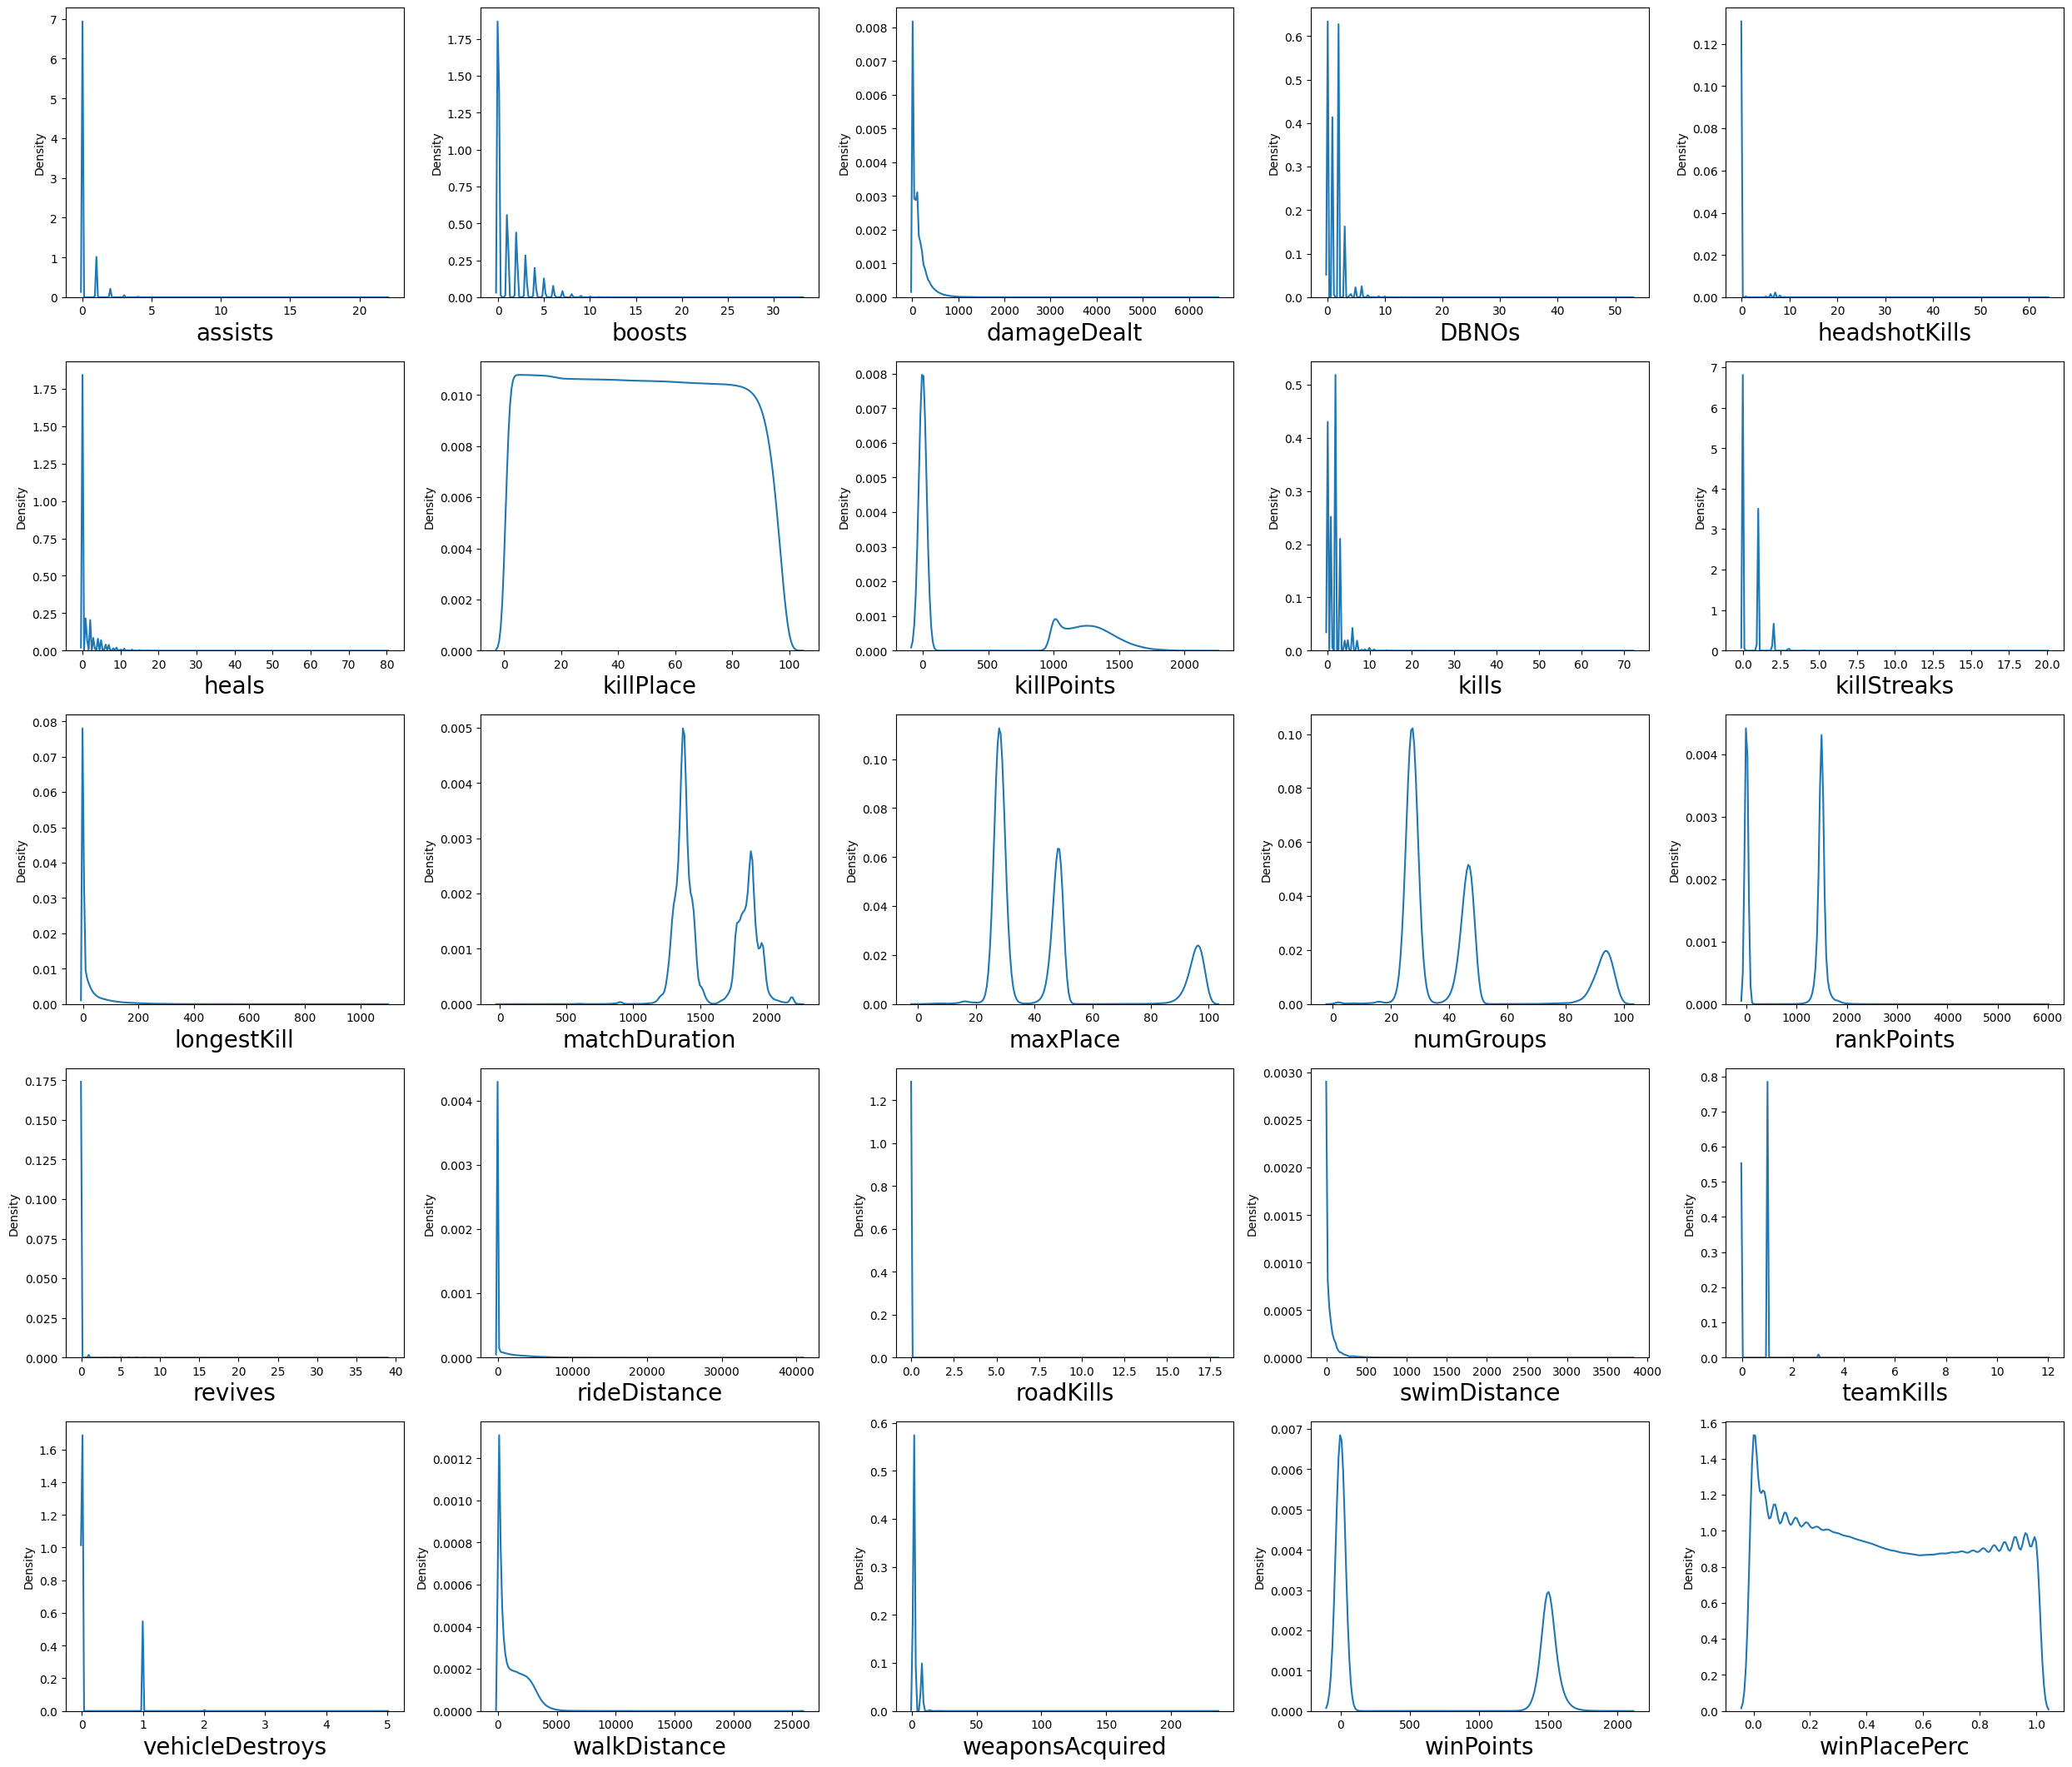

In [ ]:
def show_kdeplot(df):

  plt.figure(figsize=(len(df.columns),len(df.columns)))
  row=int(len(df.columns)**(1/2))+1
  column=int(len(df.columns)**(1/2))
  for idx,value in enumerate(df.columns):
    plt.subplot(row,column,idx+1)
    plt.xlabel(value,fontsize=20)
    sns.kdeplot(data=df.loc[:,value])

  plt.tight_layout()
  plt.show()



show_kdeplot(numeric_data)

In [ ]:
def show_boxplot(df):
  plt.figure(figsize=(len(df.columns),len(df.columns)))
  row=int(len(df.columns)**(1/2))+1
  column=int(len(df.columns)**(1/2))
  for idx,value in enumerate(df.columns):
    plt.subplot(row,column,idx+1)
    plt.xlabel(value,fontsize=20)
    sns.boxplot(data=df.loc[:,value])

  plt.tight_layout()
  plt.show()


# show_boxplot(numeric_data)


대부분의 칼럼들이 한쪽으로 skew 된 형태여서 outlier를 선정하기 쉽지 않다.

하지만 비이상적인 수치들이 몇개 보인다
1. DBNOs > 50
2. headshotKills > 60
3. roadKills>16
4. walkDistance > 25000

## 범주형 데이터 분포 확인

In [ ]:
data.dtypes[data.dtypes=='object']

Id           object
groupId      object
matchId      object
matchType    object
dtype: object

' Id, groupId, matchId' 는 단순히 고유식별자 이기 때문에 분석에 쓰기에는 용이하지 않다.

따라서 **matchtype** 만 시각화 할 예정

In [ ]:
data['matchType'].value_counts()

matchType
squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: count, dtype: int64

- fpp : 3인칭
- crashfpp, flaretpp, crashtpp : 이벤트 매치
- normal-sqaud,solo,duo : 사용자 설정 게임(?)

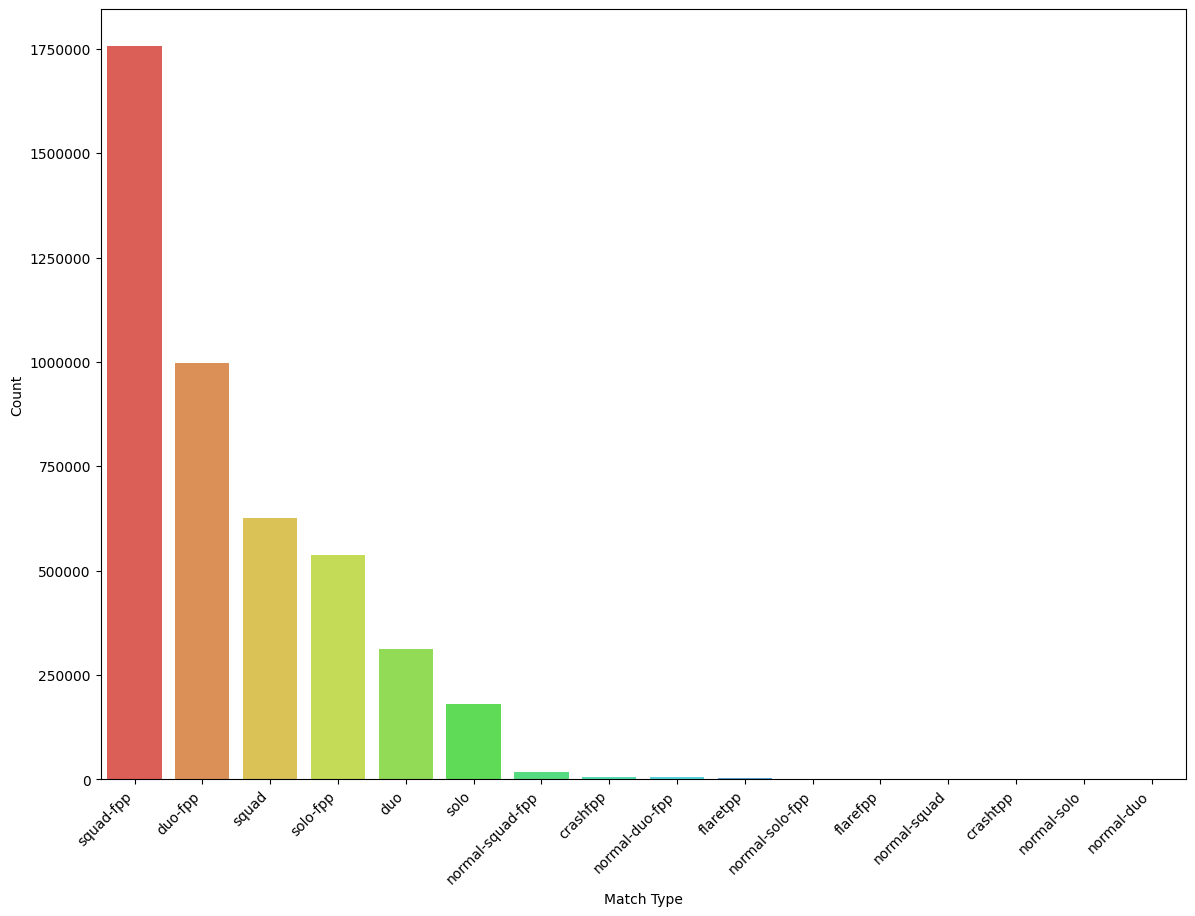

In [ ]:
colors = sns.color_palette('hls',len(data['matchType'].value_counts().keys())) ## 색상 지정


def categorical_barchart(df):
  x=df['matchType'].value_counts().keys()
  y=df['matchType'].value_counts().values


  plt.figure(figsize=(14,10))
  plt.bar(x=x,height=y,color=colors)
  plt.xticks(rotation=45, ha='right', fontsize=10)
  plt.ticklabel_format(style='plain', axis='y')
  plt.xlim(-0.5, len(x) - 0.5)


  plt.xlabel('Match Type')
  plt.ylabel('Count')
  plt.show()

categorical_barchart(data)



In [ ]:
def show_boxplot(df):
  plt.figure(figsize=(len(df.columns),len(df.columns)))
  row=int(len(df.columns)**(1/2))+1
  column=int(len(df.columns)**(1/2))
  for idx,value in enumerate(df.columns):
    plt.subplot(row,column,idx+1)
    plt.xlabel(value,fontsize=20)
    sns.boxplot(data=df.loc[:,value])

  plt.tight_layout()
  plt.show()

## 측정 오류값 확인

In [ ]:
def measure_fault_df(df):
  kp_outlier=df[df['killPlace']>100]
  kills_outlier=df[df['kills']>100]
  ks_outlier=data[df['killStreaks']>100]
  revive_outlier=df[df['revives']>100]
  tk_outlier=df[df['teamKills']>100]

  outlier_df = pd.concat([kp_outlier, kills_outlier, ks_outlier, revive_outlier, tk_outlier], axis=0)

  return outlier_df

measure_fault_df=measure_fault_df(data)
measure_fault_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3679420,a1e45f366ad76f,05c7966baad337,fe57e25e37dbfd,0,0,66.65,0,0,0,101,...,0,0.0,0,0.0,0,0,8.277,1,0,0.0


과거의 배틀그라운드에서는 죽게 되면 다시 살아날 수 있는 방법이 없었기 때문에,

매치 참가한 인원 수 보다 더 많은 킬을 한 유저가 존재 할 수 없다.

하지만 특정 match에서는 이러한 규칙이 지켜지지 않는 경우를 발견 할 수 있었다.

이때의 matchtype을 확인해보니 모두 **'normal-'** 이라는 키워드가 붙어 있었고,
사용자 설정게임에서는 일반 게임에서의 규칙이 적용되지 않음을 짐작할 수 있었다.
모든 사용자 설정게임 (normal이 붙은) 에서 매치 참가 인원 수보다 더 많은 킬을 한 유저가 존재하는 것은 아니지만, 우리가 흔히 아는 룰과 다른점이 더 있을 수도 있다고 생각이 들었다.

이는 우리가 순위를 예측하고자 하는 게임 규칙과 다르므로 모델링에 영향을 끼칠 수 있다고 생각하였다. 따라서 normal 이 붙은 매치는 모두 제거하였다.

In [ ]:
match_cnt_fault=data.groupby('matchId')['Id'].count()-data.groupby('matchId')['kills'].max()
match_cnt_fault

matchId
0000a43bce5eec    88
0000eb01ea6cdd    91
0002912fe5ed71    89
0003b92987589e    94
0006eb8c17708d    85
                  ..
fffd74b5150cb4    87
fffe53015be300    91
fffe562611d981    86
fffe721f841f85    88
fffe92232706aa    87
Length: 47965, dtype: int64

In [ ]:
match_outlier_idx=match_cnt_fault[match_cnt_fault.values<0].index
match_outlier_idx

Index(['003c2b333747d9', '0165d05e93e628', '016d03d56d3dc1', '05e997d59c48a5',
       '08e4c9e6c033e2', '0c585713a34125', '0cf7a750b26797', '0f09bd72c4ba97',
       '0feec7e8d8a8f0', '10f129a6c2be8d',
       ...
       'f2614050e9046a', 'f88d95bebc46fa', 'f900de1ec39fa5', 'fa17b5dc653216',
       'fbb3e317403d7b', 'fc0bbecba8db99', 'fcad6c3fdd847a', 'fcd20a43cb81ea',
       'fdec8e979f838c', 'fe7043ee6221c8'],
      dtype='object', name='matchId', length=126)

In [ ]:
data[data['matchId'].isin(match_outlier_idx)].loc[:,'matchType'].value_counts()

matchType
normal-solo-fpp     687
normal-squad-fpp    613
normal-duo-fpp      413
normal-solo         188
normal-squad         83
normal-duo           35
Name: count, dtype: int64

## 이벤트 매치 확인

앞서 normal 이 붙은 매치를 버린것과 동일한 이유로 이벤트 매치

[ crashfpp, flaretpp, flarefpp, crashtpp ]

에 대해서 확인을 진행하고자 한다.

In [ ]:
event_type=[ 'crashfpp', 'flaretpp', 'flarefpp', 'crashtpp' ]

event_match_df=data[data['matchType'].isin(event_type)]
event_match_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,...,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000
mean,0.223459,1.202813,103.710357,0.588200,0.113754,1.403502,44.252201,28.742030,0.810545,0.518166,...,0.114766,1756.328278,0.216172,2.929709,0.065074,0.061735,927.452594,2.455622,43.113045,0.463218
std,0.568096,1.651081,148.707373,1.039863,0.393539,2.652289,26.085843,167.089052,1.395022,0.742097,...,0.427527,2240.321115,0.688707,25.883603,0.260636,0.288501,969.498237,2.251738,250.633578,0.310978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,249.800000,1.000000,0.000000,0.183700
50%,0.000000,0.000000,58.800000,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,...,0.000000,378.500000,0.000000,0.000000,0.000000,0.000000,576.600000,2.000000,0.000000,0.449000
75%,0.000000,2.000000,148.600000,1.000000,0.000000,2.000000,66.000000,0.000000,1.000000,1.000000,...,0.000000,3373.000000,0.000000,0.000000,0.000000,0.000000,1322.000000,3.000000,0.000000,0.734700
max,9.000000,16.000000,2339.000000,21.000000,6.000000,26.000000,100.000000,1000.000000,15.000000,8.000000,...,17.000000,12550.000000,10.000000,559.800000,3.000000,5.000000,8885.000000,16.000000,1500.000000,1.000000


이벤트 매치를 왜 버리기로 했더라요..훔 수치상에서 이상했던 부분이 있었던 것 같은데 기억이 안나서 일단 넘어갈게용]


## 탈주자 확인

In [ ]:
runaway_num=data['maxPlace']-data['numGroups']
runaway_num

0          2
1          1
2          3
3          1
4          2
          ..
4446961    1
4446962    0
4446963    0
4446964    1
4446965    4
Length: 4446966, dtype: int64

In [ ]:
runaway_num.value_counts().sort_index()

0     1241090
1     1412262
2      937630
3      475634
4      209379
5       94772
6       34785
7       15148
8        6710
9        3784
10       2147
11       1263
12       1460
13       1167
14       1948
15       2837
16       2465
17       1180
18        480
19        201
20        188
22         89
25         46
26         47
27         58
36         99
63         97
Name: count, dtype: int64

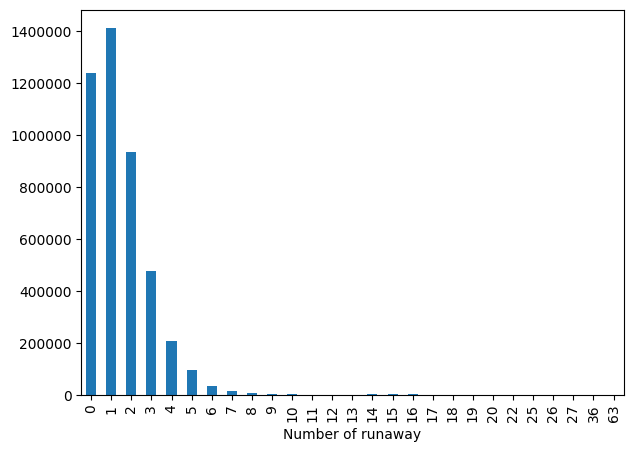

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.xlabel("Number of runaway")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)


runaway_num.value_counts().sort_index().plot(kind='bar')


plt.show()

## 다중공선성 확인


독립변수들간의 상관관계를 확인하고, 모델링 전에 해결하고자 한다.

이를 위해서

1. **상관관계 그래프** ( 절댓값 0.8 이상의 값을 갖는 )
2. **VIF 지수** ( 10 이상을 갖는 )

feature들을 뽑아 전처리를 진행하고자 한다.

### 상관계수 그래프 시각화

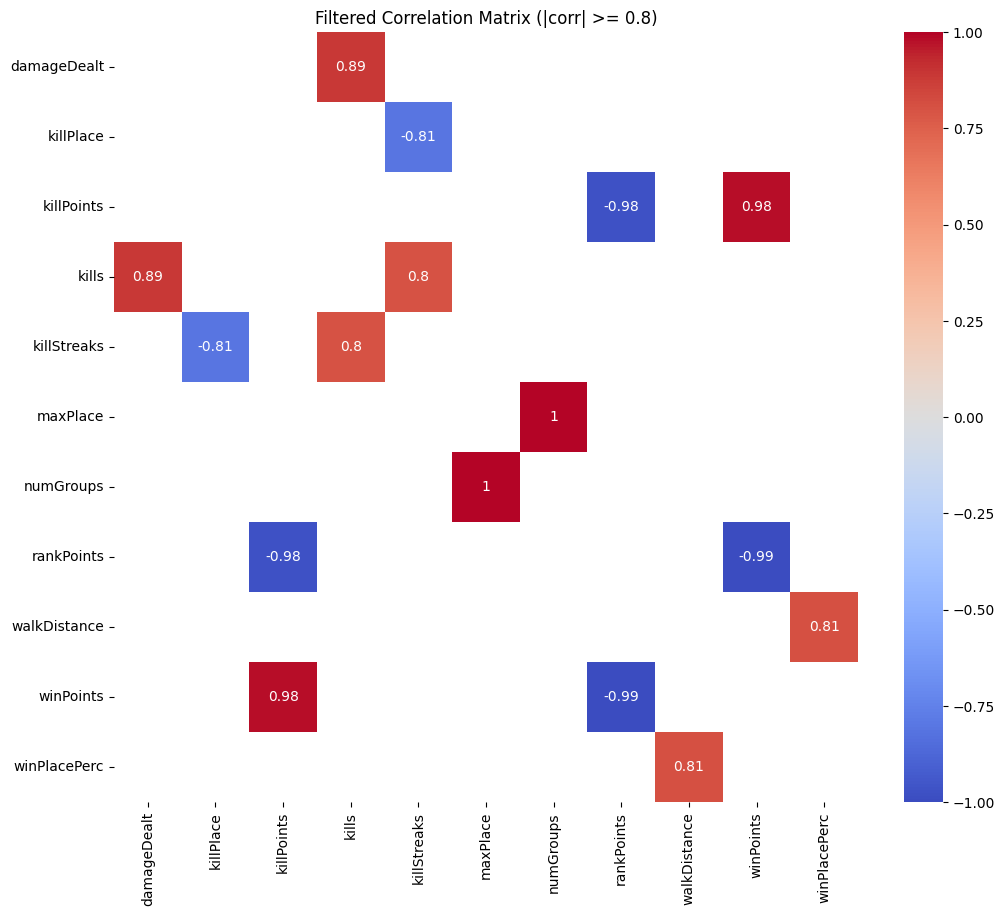

In [ ]:
def show_corr_matrix(df,threshold):
  corr_matrix =df.select_dtypes(include=['int', 'float']).corr()
  filtered_corr_matrix = corr_matrix[(corr_matrix.abs() >= threshold) & (corr_matrix != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

  plt.figure(figsize=(12, 10))
  sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
  plt.title(f'Filtered Correlation Matrix (|corr| >= {threshold})')
  plt.show()

  return filtered_corr_matrix


filtered_corr_matrix=show_corr_matrix(data,0.8)

### VIF 지수 확인


In [ ]:
## 이 함수를 사용하기 위해서는 Null 값을 모두 제거해야함
def calculate_VIF(df):
    df=df.select_dtypes(include=['int', 'float'])
    VIF_data = pd.DataFrame()
    VIF_data["feature"] = df.columns
    VIF_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return VIF_data

VIF_df=calculate_VIF(data.select_dtypes(include=['int', 'float']))

In [ ]:
VIF_df

,feature,VIF
0,assists,1.497859
1,boosts,3.342812
2,damageDealt,9.694830
3,DBNOs,3.749044
4,headshotKills,2.128533
5,heals,1.885352
6,killPlace,25.098072
7,killPoints,53.229336
8,kills,10.966259
9,killStreaks,7.977903


In [ ]:
high_corr_list=list(filtered_corr_matrix.index)
high_VIF_list=list(VIF_df[VIF_df['VIF']>10].loc[:,'feature'])

set(high_corr_list)and set(high_VIF_list)

{'killPlace',
 'killPoints',
 'kills',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'winPlacePerc',
 'winPoints'}

상관관계계수>0.8 과 VIF>10 에 공통적으로 속하는 feature들을 뽑았다.
여기서 target 컬럼을 제외하게되면

['KillPlace' , 'killPoints' , 'kills' , 'maxPlace' , 'numGroups' , 'rankPoints' , 'winPoints' ]   가 있음을 볼 수 있다.

3가지 유형으로 나뉘게 된다.

1. 유저의 실력을 나타내는 매치 외부 변수 : ['killPoints', 'rankPoints', 'winPoints' ]

2. 매치 내부 변수 : ['KillPlace','Kills']

3. 매치 정보 변수 : ['maxPlace','numGroups']


1번은 좀 생각해보고 아예 없애거나 하나로 합칠 수 있을 듯?

-> 1번은 다 버리기~ 우리 프로젝트 목표는 딱 인게임 내에서를 기반으로 실력 측정이 목표 이기 떄문 !


2번은 매치 내부에서 유저의 실제 킬 수 /한 유저가 할 수 있는 최대 킬로 바꾸어서 진행을 할 수 있을까 ? 근데 그러면 솔쿼드 인지 아닌지를 파악할 수 있어야 하는데 그러지는 못할 것 같음 ! 그렇다면 killplace와 kill을 합치는 방향으로 가야할 듯? -> killRatio

3번 같은 경우는 둘 중 하나만 사용하면 될 것 같음 ! -> maxPlace

## 4명 초과 그룹들 확인

한 그룹에 할당돼있는 인원이 4명 초과돼 있는 그룹들을 발견하였다. 왜 이런 현상이 발생하였는가 찾아보니 데이터를 올려준 주최측의 답변을 찾았다.

출처: https://www.kaggle.com/c/pubg-finish-placement-prediction/discussion/67742
1) The match is from a custom game/event (If there are more than 8 in a group, it is almost definitely this one)

2) The API mistakenly reported two groups as placing in the same place, and in creating groupId these groups were clumped as one larger group. This is also a contributor to the difference between "numGroups" and "maxPlace" (Teams leaving the game may also contribute).

3) There is a very rare bug in the game in which more than 4 people end up in one group (I am not sure if any of these games are included in this dataset).

I hope that this can help clarify group sizes.

1. 이벤트 매치에서는 존재 할 수 있다 -> 우리는 이벤트 매치를 빼고 진행하였기 때문에 이에 해당하지 않음.

2. API가 그룹화하는 과정에서 실수 하였다.

3. 게임내에서 4명 초과 그룹이 할당되는 경우가 있긴 하지만 거의 드물다.


따라서 데이터셋에서는 2번 문제로 인한 것 이라 판단하였다.
물론 api가 단순히 그룹id에서만 실수를 하고 실제 winplacePercentage 에서는 맞게 기재가 돼있다면 문제가 없겠지만, 그렇지 않았으므로 모델링에 부정적인 영향을 줄 것이라 판단하고 이를 모두 버리기로 하였다.

In [ ]:
def API_fault_df(df):
  if df['matchType']=='solo'

# 3. 데이터 전처리

## 파생변수 추가

### matchType

앞서 확인한 이벤트 매치,normal이 붙은 매치들에 대해서 전처리를 진행하고자 한다.

In [ ]:
def drop_eventmatch(df):
  event_type=[ 'crashfpp', 'flaretpp', 'flarefpp', 'crashtpp' ]
  df=df.drop(index=df[df['matchType'].isin(event_type)].index,axis=1)

  return df

### teamWork
실제 배틀그라운드 플레이를 진행했을 때, 스쿼드를 플레이하게 되면 팀워크가 중요하다는 것을 느낄 수 있었다.

따라서 이를 위한 파생변수 teamWork = revives + assists- teamkills 를 추가 하고자 한다.

In [ ]:
def make_teamWork(x):
  if 'squad' in x['matchType'] or 'duo' in x['matchType']:
    return x['revives']+x['assists']-x['teamKills']
  else:
    return 0

In [ ]:
def auto_make_teamwork(df):
  df['teamWork']=df.apply(make_teamWork)
  return df

### headshotRatio

배틀그라운드에서는 헤드샷의 데미지가 월등히 높다.
( 총들 마다 계수가 다르지만 대략 2.5배 )
따라서 이 칼럼을 추가한다면 예측하고자 하는 값에 큰 도움을 줄 수 있을 것으로 생각 된다.

In [ ]:
def make_headshotRatio(x):
  if x['kills']==0:
    return 0
  else:
    return x['headshotKills']/x['kills']

In [ ]:
def auto_make_headshotRatio(df):
  df['headshotRatio']=df.apply(make_headshotRatio,axis=1)
  return df

### killRatio
kill / 최대 가능 킬 수 (match 인원 수 - 자기 그룹 인원 수) 로 killRatio 를 파생변수로 추가함으로서 ,
kill과 killPlace의 다중공선성을 줄이고자 한다.

이를 위해서

memberCnt( 그룹안에 멤버 수 ),
userCnt( 매치안에 유저 수 ) 를 생성하고 진행하였다.

이 과정에서 데이터셋의 오류를 발견 할 수 있었다.

한 그룹에 할당돼있는 인원이 4명 초과돼 있는 그룹들을 발견하였다. 왜 이런 현상이 발생하였는가 찾아보니 데이터를 올려준 주최측의 답변을 찾았다.

출처: https://www.kaggle.com/c/pubg-finish-placement-prediction/discussion/67742
1) The match is from a custom game/event (If there are more than 8 in a group, it is almost definitely this one)

2) The API mistakenly reported two groups as placing in the same place, and in creating groupId these groups were clumped as one larger group. This is also a contributor to the difference between "numGroups" and "maxPlace" (Teams leaving the game may also contribute).

3) There is a very rare bug in the game in which more than 4 people end up in one group (I am not sure if any of these games are included in this dataset).

I hope that this can help clarify group sizes.

1. 이벤트 매치에서는 존재 할 수 있다 -> 우리는 이벤트 매치를 빼고 진행하였기 때문에 이에 해당하지 않음.

2. API가 그룹화하는 과정에서 실수 하였다.

3. 게임내에서 4명 초과 그룹이 할당되는 경우가 있긴 하지만 거의 드물다.


따라서 데이터셋에서는 2번 문제로 인한 것 이라 판단하였다.
물론 api가 단순히 그룹id에서만 실수를 하고 실제 winplacePercentage 에서는 맞게 기재가 돼있다면 문제가 없겠지만, 그렇지 않았으므로 모델링에 부정적인 영향을 줄 것이라 판단하고 이를 모두 버리기로 하였다.

In [ ]:
def make_killRatio(df):
  userCnt=df.groupby('matchId')['Id'].count()
  memberCnt=df.groupby(['matchId','groupId'])['Id'].count()

  userCnt=userCnt.reset_index()
  userCnt.rename(columns={'Id':'userCnt'},inplace=True)

  memberCnt=memberCnt.reset_index()
  memberCnt.rename(columns={'Id':'memberCnt'},inplace=True)

  df=pd.merge(df,userCnt,on='matchId')
  df=pd.merge(df,memberCnt,on=['matchId','groupId'],how='left')

  df['killRatio']=df['kills']/(df['userCnt']-df['memberCnt'])

  return df


In [ ]:
userCnt=data.groupby('matchId')['Id'].count()
memberCnt=data.groupby(['matchId','groupId'])['Id'].count()

In [ ]:
userCnt=userCnt.reset_index()
userCnt.rename(columns={'Id':'userCnt'},inplace=True)

In [ ]:
memberCnt=memberCnt.reset_index()
memberCnt.rename(columns={'Id':'memberCnt'},inplace=True)

In [ ]:
data=pd.merge(data,userCnt,on='matchId')

In [ ]:
data=pd.merge(data,memberCnt,on=['matchId','groupId'],how='left')

data['killRatio']=data['kills']/(data['userCnt']-data['memberCnt'])

In [ ]:
data=make_killRatio(data)

In [ ]:
data[data['userCnt']==data['memberCnt']]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,userCnt,memberCnt,killRatio


In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'userCnt', 'memberCnt',
       'killRatio'],
      dtype='object')

## 데이터 드롭 & 가공

### measure_fault_df

In [ ]:
measure_fault_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3679420,a1e45f366ad76f,05c7966baad337,fe57e25e37dbfd,0,0,66.65,0,0,0,101,...,0,0.0,0,0.0,0,0,8.277,1,0,0.0


In [ ]:
data.drop(index=measure_fault_df.index,inplace=True)

### 'normal' match

In [ ]:
event_type=[ 'crashfpp', 'flaretpp', 'flarefpp', 'crashtpp' ]
data=data.drop(index=data[data['matchType'].str.contains('normal')].index,axis=0)

### event type

In [ ]:
def drop_eventmatch(df):
  event_type=[ 'crashfpp', 'flaretpp', 'flarefpp', 'crashtpp' ]
  df=df.drop(index=df[df['matchType'].isin(event_type)].index,axis=1)
  return df

data=drop_eventmatch(data)

In [ ]:
data['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo'],
      dtype=object)

### outlier

앞서 수치형 변수 분포를 통해 살펴본

1. DBNOs > 50
2. headshotKills > 60
3. roadKills>16
4. walkDistance > 25000

버릴거

In [ ]:
outlier_df=pd.concat([data[data['DBNOs']>50],
                      data[data['headshotKills']>60],
                      data[data['roadKills']>16],
                      data[data['walkDistance']>25000]])

In [ ]:
data.drop(index=outlier_df.index,inplace=True)

### API fault

squad/duo/solo member_cnt

In [ ]:
sqaud_fault_df=data[(data['matchType']=='squad')&(data['memberCnt']>4)]
duo_fault_df=data[(data['matchType']=='duo')&(data['memberCnt']>2)]
solo_fault_df=data[(data['matchType']=='solo')&(data['memberCnt']>1)]

api_fault_df=pd.concat([sqaud_fault_df,duo_fault_df,solo_fault_df])

In [ ]:
api_fault_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,userCnt,memberCnt,killRatio
2,72dfd1f3796a0e,80d9f9014c6e68,a10357fd1a4a91,0,0,0.00,0,0,0,82,...,0.0,0,0,28.34,0,1500,0.0741,96,7,0.000000
9,c40f71d9ba7ebf,edbce070d4ee9d,a10357fd1a4a91,0,0,0.00,0,0,0,69,...,0.0,0,0,91.39,2,1473,0.2963,96,5,0.000000
13,34673dfdd74aae,654c638629b8fc,a10357fd1a4a91,0,2,292.80,2,0,1,10,...,0.0,0,0,359.90,3,1464,0.4815,96,8,0.034091
15,8489b84dff1142,a269f08371068b,a10357fd1a4a91,0,0,24.48,0,0,0,92,...,0.0,0,0,38.80,1,1512,0.0370,96,5,0.000000
20,2410d3756d95bc,a269f08371068b,a10357fd1a4a91,0,0,0.00,0,0,0,91,...,0.0,0,0,20.32,1,1470,0.0370,96,5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411691,0097150d5f393b,8c5115be85a2a7,7ae14295044ffe,0,0,0.00,0,0,0,9,...,0.0,0,0,0.00,2,0,0.0000,19,19,NaN
4411692,132eed3f60295f,8c5115be85a2a7,7ae14295044ffe,0,0,475.10,0,0,0,3,...,0.0,0,0,0.00,2,0,0.0000,19,19,NaN
4411693,599862098e811b,8c5115be85a2a7,7ae14295044ffe,0,0,41.34,0,0,0,10,...,0.0,0,0,0.00,1,0,0.0000,19,19,NaN
4411694,a9f5eb6c064350,8c5115be85a2a7,7ae14295044ffe,0,0,0.00,0,0,0,1,...,0.0,0,0,0.00,1,0,0.0000,19,19,NaN


In [ ]:
data=data.drop(index=api_fault_df.index)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,userCnt,memberCnt,killRatio
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.8,1,1466,0.4444,96,4,0.000000
1,09824fabf2cdc0,7e5fb71e05a678,a10357fd1a4a91,1,1,335.40,3,1,1,29,...,0.00,1,0,2136.0,7,1487,0.8148,96,4,0.010870
3,17cf1ec59eb8c3,74898d59ac4879,a10357fd1a4a91,0,0,95.90,0,0,3,28,...,0.00,0,0,3490.0,6,1495,0.8519,96,4,0.010870
4,6472d358a8b956,5112ebf44e9575,a10357fd1a4a91,0,2,22.01,1,1,0,24,...,0.00,0,0,2570.0,5,1474,0.9630,96,4,0.010870
5,fe0e649b75091a,69c3ba1a23df2a,a10357fd1a4a91,0,2,200.00,2,0,1,26,...,0.00,0,0,3414.0,5,1523,0.9259,96,4,0.010870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411514,92856c2d39df75,d7eafb87555938,4e5d7dbdde159a,0,6,192.20,0,0,6,7,...,26.92,0,0,1676.0,4,0,0.5294,18,1,0.058824
4411526,cafb1e6ebaaed6,eb8ec5ef005f30,56a978ddecc196,0,0,19.80,0,0,0,1,...,0.00,0,0,0.0,5,0,1.0000,15,1,0.000000
4411573,63045356ac2fda,ae796792879110,89658ff71373e0,0,0,0.00,0,0,0,1,...,0.00,0,0,0.0,3,0,1.0000,16,1,0.000000
4411649,0316197a83482b,1973cda11ace93,ea31f72fb8b639,0,0,219.00,0,0,1,1,...,0.00,0,0,0.0,3,0,1.0000,11,1,0.000000


In [ ]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,userCnt,memberCnt,killRatio
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.8,1,1466,0.4444,96,4,0.000000
1,09824fabf2cdc0,7e5fb71e05a678,a10357fd1a4a91,1,1,335.40,3,1,1,29,...,0.00,1,0,2136.0,7,1487,0.8148,96,4,0.010870
3,17cf1ec59eb8c3,74898d59ac4879,a10357fd1a4a91,0,0,95.90,0,0,3,28,...,0.00,0,0,3490.0,6,1495,0.8519,96,4,0.010870
4,6472d358a8b956,5112ebf44e9575,a10357fd1a4a91,0,2,22.01,1,1,0,24,...,0.00,0,0,2570.0,5,1474,0.9630,96,4,0.010870
5,fe0e649b75091a,69c3ba1a23df2a,a10357fd1a4a91,0,2,200.00,2,0,1,26,...,0.00,0,0,3414.0,5,1523,0.9259,96,4,0.010870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411512,90bab68b8f50f1,faeaa293f49338,4e5d7dbdde159a,0,3,691.40,0,3,10,1,...,17.61,0,0,2506.0,6,0,1.0000,18,1,0.352941
4411514,92856c2d39df75,d7eafb87555938,4e5d7dbdde159a,0,6,192.20,0,0,6,7,...,26.92,0,0,1676.0,4,0,0.5294,18,1,0.058824
4411526,cafb1e6ebaaed6,eb8ec5ef005f30,56a978ddecc196,0,0,19.80,0,0,0,1,...,0.00,0,0,0.0,5,0,1.0000,15,1,0.000000
4411573,63045356ac2fda,ae796792879110,89658ff71373e0,0,0,0.00,0,0,0,1,...,0.00,0,0,0.0,3,0,1.0000,16,1,0.000000


### matchType 통일

In [ ]:
def delete_fpp(x):
  x.strip()
  return x.replace('-fpp','')

data['matchType']=data['matchType'].apply(delete_fpp)

data['matchType'].value_counts()

matchType
squad    2382712
duo      1310282
solo      718705
Name: count, dtype: int64

### 쓰지 않을 feature들 버리기



In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'userCnt', 'memberCnt',
       'killRatio'],
      dtype='object')

In [ ]:
del_features=['Id','groupId','matchId','assists','headshotKills','killPoints',
              'kills','longestKill','numGroups','rankPoints','revives','teamKills','winPoints']

data.drop(columns=del_features)

# 4. 데이터 분석 및 모델링

In [ ]:
from google.colab import drive

drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
final_data=pd.read_csv("/gdrive/MyDrive/PUBG/final_df.csv")

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503000 entries, 0 to 3502999
Data columns (total 30 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Id               object 
 2   groupId          object 
 3   matchId          object 
 4   assists          int64  
 5   boosts           int64  
 6   damageDealt      float64
 7   DBNOs            int64  
 8   headshotKills    int64  
 9   heals            int64  
 10  killPlace        int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  matchDuration    int64  
 14  matchType        object 
 15  maxPlace         int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPlacePerc     float64
 25  teamWork         int64  
 26  headshotRatio    float64
 27  member_cnt  

In [ ]:
final_del_features=['Unnamed: 0','Id','groupId','matchId','assists','headshotKills','kills','revives','teamKills']

final_data=final_data.drop(columns=final_del_features)

### match 유형별 분포 확인

In [ ]:
def show_histogram(df,color):

  plt.figure(figsize=(len(df.columns),len(df.columns)))
  row=int(len(df.columns)**(1/2))+1
  column=int(len(df.columns)**(1/2))
  for idx,value in enumerate(df.columns):
    plt.subplot(row,column,idx+1)
    plt.xlabel(value,fontsize=20)
    plt.hist(data=df.loc[:,value],color=color)

  plt.tight_layout()
  plt.show()



show_histogram(final_data[final_data['matchType']=='solo'],'red')
show_histogram(final_data[final_data['matchType']=='duo'],'blue')
show_histogram(final_data[final_data['matchType']=='squad'],'green')

In [ ]:
final_data=final_data.drop(columns=['member_cnt','userCnt'])

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503000 entries, 0 to 3502999
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   boosts           int64  
 1   damageDealt      float64
 2   DBNOs            int64  
 3   heals            int64  
 4   killPlace        int64  
 5   killStreaks      int64  
 6   matchDuration    int64  
 7   matchType        object 
 8   maxPlace         int64  
 9   rideDistance     float64
 10  roadKills        int64  
 11  swimDistance     float64
 12  vehicleDestroys  int64  
 13  walkDistance     float64
 14  weaponsAcquired  int64  
 15  winPlacePerc     float64
 16  teamWork         int64  
 17  headshotRatio    float64
 18  killRatio        float64
dtypes: float64(7), int64(11), object(1)
memory usage: 507.8+ MB


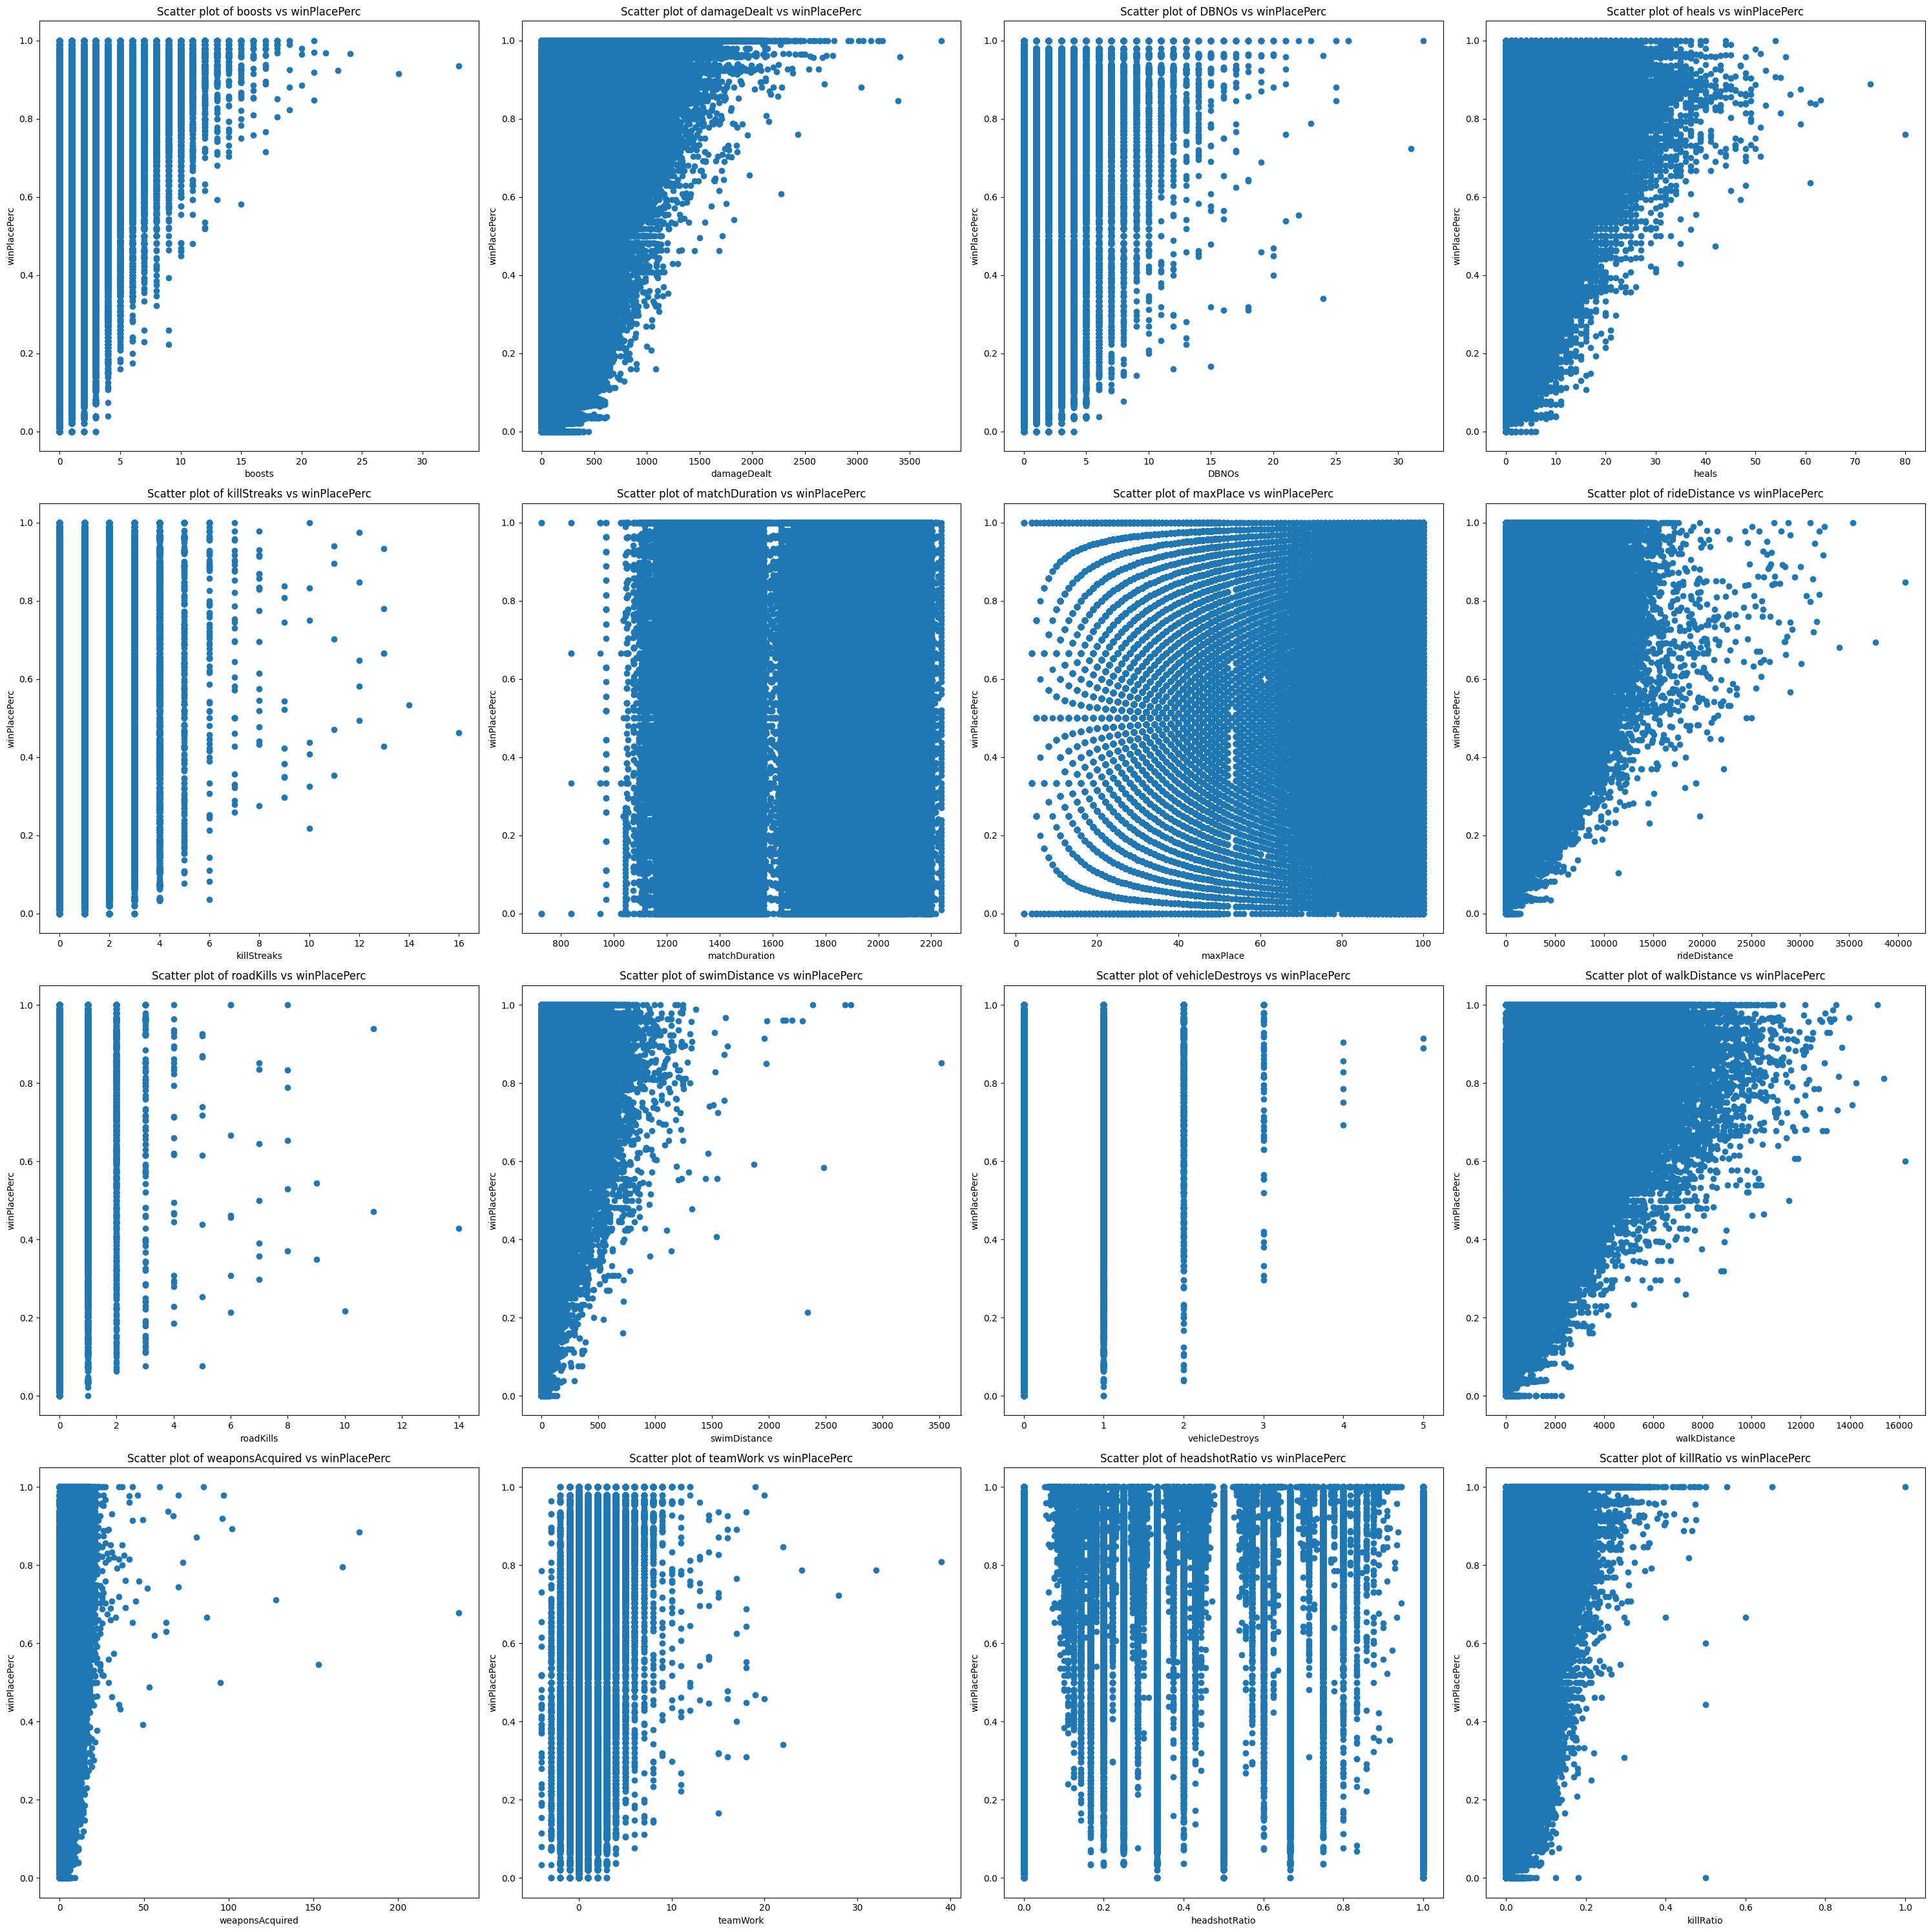

In [ ]:
target='winPlacePerc'
features=list(final_data.select_dtypes(include=['int', 'float'])
)
features.remove(target)

plt.figure(figsize=(30,30))
for idx,feature in enumerate(features):
        plt.subplot(4,4,idx+1)
        plt.scatter(final_data[feature], final_data['winPlacePerc'])
        plt.xlabel(feature)
        plt.ylabel('winPlacePerc')
        plt.title(f'Scatter plot of {feature} vs winPlacePerc')


plt.tight_layout()
plt.show()

앞서 다중공선성 문제와 오버피팅 문제(차원이 너무 높기 때문에 ) 를 해결하기 위해서 피쳐를 버리거나 합치는 과정을 진행 했음에도 불구하고 아직까지 상관관계가 높아보이는 feature 들이 존재함을 확인 할 수 있다.

이 변수들은 종속변수와의 상관관계가 높기 때문에 단순히 버린다는 선택을 하기 쉽지 않았다.


이와 더불어 모델링을 고민하던 도중, 종속변수와 독립변수들 간의 선형성을 확인하기 위하여 scatterplot을 그렸고, 선형관계가 아님을 확인했다.

따라서 비선형관계인 데이터 모델링을 위해서 randomforest regressor를 선택하게 되었고,

이 모델은 다중공선성 영향을 덜 받기 떄문에 앞서 고민한 변수들을 그냥 갖고 가기로 결정했다.

### Scaling

우리의 타겟컬럼인 winPlacePerc 는 0-1의 값을 갖는다.

따라서 다른 컬럼들 또한 이 분포를 갖는것이 모델링에 도움이 될 것이라 생각했고

이를 위해서 minmaxScaler를 사용하였다.

In [ ]:
data=data.drop(columns=['Id','groupId','matchId'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


target='winPlacePerc'
solo_data=final_data[final_data['matchType']=='solo']
solo_y=final_data[target]
solo_X=final_data.drop(columns=['winPlacePerc','matchType'])

minmax_scaler=MinMaxScaler()



solo_X[solo_X.columns]=minmax_scaler.fit_transform(solo_X)
X_train, X_test, y_train, y_test = train_test_split(solo_X, solo_y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(solo_X, solo_y, test_size=0.2, random_state=42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(solo_X, solo_y, test_size=0.2, random_state=42)

In [ ]:
X_train

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
4367250,1,0,0.00,0,0,0,80,0,0,0,...,1155,1,0.00,0,0.0,0,0,176.9,2,0
3336275,0,0,0.00,0,0,0,70,0,0,0,...,1529,0,0.00,0,0.0,0,0,119.2,3,0
2374901,0,1,35.23,0,0,5,58,1400,0,0,...,-1,0,1470.00,0,0.0,0,0,828.3,8,1556
1793040,0,2,100.00,0,1,1,28,0,1,1,...,1500,0,0.00,0,0.0,0,0,832.8,5,0
42889,0,1,225.70,0,0,3,58,0,0,0,...,1908,0,1613.00,0,0.0,0,0,1974.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136074,0,8,29.83,0,0,2,41,0,0,0,...,1510,0,0.00,0,0.0,0,0,2052.0,5,0
1570006,0,1,0.00,0,0,4,61,0,0,0,...,1510,0,86.49,0,0.0,0,0,1053.0,3,0
2234489,0,0,0.00,0,0,0,84,0,0,0,...,1484,0,0.00,0,0.0,0,0,0.0,0,0
4304572,0,1,386.20,1,0,1,9,0,3,2,...,1483,0,0.00,0,0.0,0,0,2026.0,6,0


### Randomforest Regressor

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

start = time.time()

X_train, X_test, y_train, y_test = train_test_split(solo_X, solo_y, test_size=0.2, random_state=42)



rf = RandomForestRegressor(min_samples_leaf=2,max_depth=20,n_estimators=200,random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r_squared}")


print("time :", time.time() - start)
## 14분 15초 ? 으으으으음 왜 갑자기 빨리 된거지?를 모르겠어요 흐으으으음
## 으으음 criterion 을 그냥 디폴트걸로 해서 그런가... 그러면 max_depth 더 늘려서 해봐도 될거같은데 으음 영주님거가 20이 최적이면 전 더 안늘려도 될거같고 ....


Mean Absolute Error: 0.06768273960264105
Mean Squared Error: 0.007922156781343904
Root Mean Squared Error: 0.08900649853434245
R-squared: 0.9066141110396839
time : 811.1011497974396


### LightGBM - no scaling

데이터셋의 크기가 60만개 정도 되기 떄문에 ,



이 때문에 일어나는 과적합은 낮을것이라 판단하고 메모리, 시간에서 큰 효율성을 발휘하는 LightBGM을 사용하였다.

In [ ]:
import time

start = time.time()


from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


lgbc = LGBMRegressor(force_col_wise=True)
lgbc.fit(X_train,y_train)

y_pred=lgbc.predict(X_test)


GBM_mae = mean_absolute_error(y_test, y_pred)
GBM_mse = mean_squared_error(y_test, y_pred)
GBM_rmse = np.sqrt(GBM_mse)
GBM_r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {GBM_mae}")
print(f"Mean Squared Error: {GBM_mse}")
print(f"Root Mean Squared Error: {GBM_rmse}")
print(f"R-squared: {GBM_r_squared}")

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[LightGBM] [Info] Total Bins 1916
[LightGBM] [Info] Number of data points in the train set: 2802400, number of used features: 17
[LightGBM] [Info] Start training from score 0.533835
Mean Absolute Error: 0.061030439758735684
Mean Squared Error: 0.006976113843963467
Root Mean Squared Error: 0.08352313358563283
R-squared: 0.9200674913129274
time : 58.93695783615112


### LightGBM - scaling

In [ ]:
import time

start = time.time()


from lightgbm import LGBMRegressor

lgbc = LGBMRegressor(force_col_wise=True)
lgbc.fit(X_train,y_train)

y_pred=lgbc.predict(X_test)


scaling_GBM_mae = mean_absolute_error(y_test, y_pred)
scaling_GBM_mse = mean_squared_error(y_test, y_pred)
scaling_rmse = np.sqrt(scaling_GBM_mse)
scaling_GBM_r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {scaling_GBM_mae}")
print(f"Mean Squared Error: {scaling_GBM_mse}")
print(f"Root Mean Squared Error: {scaling_rmse}")
print(f"R-squared: {scaling_GBM_r_squared}")

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[LightGBM] [Info] Total Bins 2801
[LightGBM] [Info] Number of data points in the train set: 3557572, number of used features: 24
[LightGBM] [Info] Start training from score 0.472873
Mean Absolute Error: 0.06041678816826583
Mean Squared Error: 0.007173982837441011
Root Mean Squared Error: 0.0846993673969352
R-squared: 0.9240571559472434
time : 89.44211935997009


In [ ]:
import time

start = time.time()


from lightgbm import LGBMRegressor

lgbc = LGBMRegressor(force_col_wise=True)
lgbc.fit(X_train,y_train)

y_pred=lgbc.predict(X_test)


scaling_GBM_mae = mean_absolute_error(y_test, y_pred)
scaling_GBM_mse = mean_squared_error(y_test, y_pred)
scaling_rmse = np.sqrt(scaling_GBM_mse)
scaling_GBM_r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {scaling_GBM_mae}")
print(f"Mean Squared Error: {scaling_GBM_mse}")
print(f"Root Mean Squared Error: {scaling_rmse}")
print(f"R-squared: {scaling_GBM_r_squared}")

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 539896, number of used features: 14
[LightGBM] [Info] Start training from score 0.504517
Mean Absolute Error: 0.06670472644620644
Mean Squared Error: 0.0076975603663585485
Root Mean Squared Error: 0.0877357416698494
R-squared: 0.9092616395410259
time : 10.368745803833008


###xgbRegressor

In [ ]:
import time
start = time.time()

from xgboost import XGBRegressor

xgbR = XGBRegressor()
xgbR.fit(X_train,y_train)

y_pred=xgbR.predict(X_test)


xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {xgb_mae}")
print(f"Mean Squared Error: {xgb_mse}")
print(f"Root Mean Squared Error: {xgb_rmse}")
print(f"R-squared: {xgb_r_squared}")


print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

Mean Absolute Error: 0.06670472644620644
Mean Squared Error: 0.0076975603663585485
Root Mean Squared Error: 0.0877357416698494
R-squared: 0.9092616395410259
time : 9.131410360336304


# 5. 결과 시각화 및 인사이트 도출

# 6. 피드백
